## Two Way ANOVA
- Extension of One-way ANOVA, a special case of a GLM.
- Two factors, each with $\geq 2$ levels. 
- Uses a maximum of $(G_1-1) + (G_2 - 1) +(G_1-1)(G_2 - 1)$ (individual + interactions)indicator variables

_**Two types of factors**_<br>
 - FIXED effect: data has been gathered from all the levels of the factor that are of interest
 - Random effect: interest is in all possible levels of factor, but only a random sample of levels is included in the data. 

#### Case Study The Pygmalion Effect

In [6]:
library(Sleuth2)
data = case1302
head(data)
score = data$Score
company = as.factor(data$Company)
treat = as.factor(data$Treat)

Company,Treat,Score
C1,Pygmalion,80.0
C1,Control,63.2
C1,Control,69.2
C2,Pygmalion,83.9
C2,Control,63.1
C2,Control,81.5


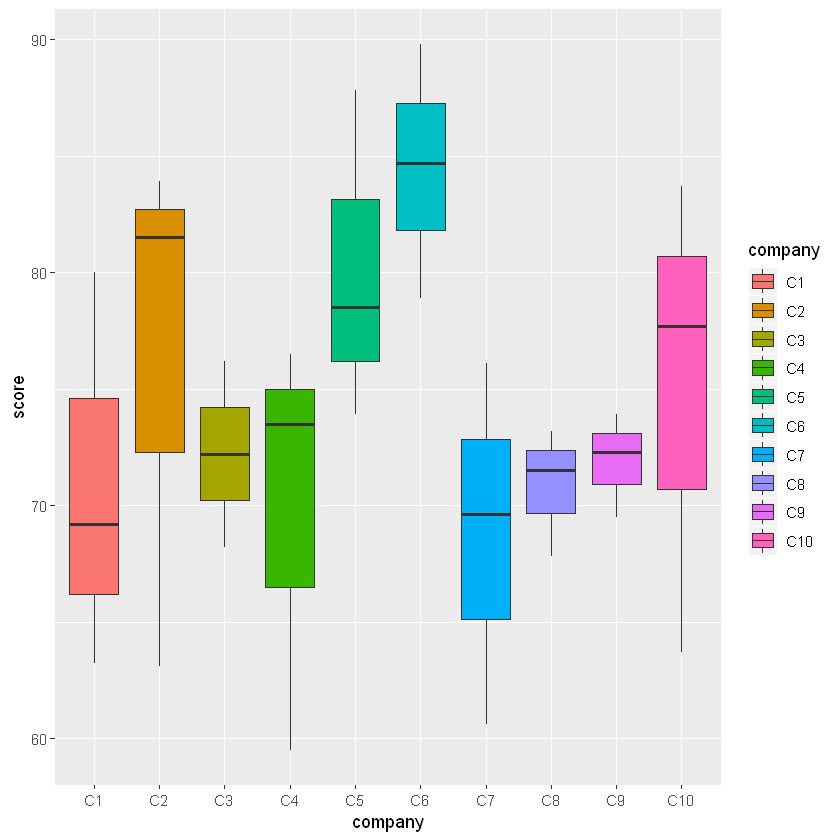

In [8]:
library(ggplot2)
ggplot(data, aes(x=company, y=score, fill=company)) + geom_boxplot()

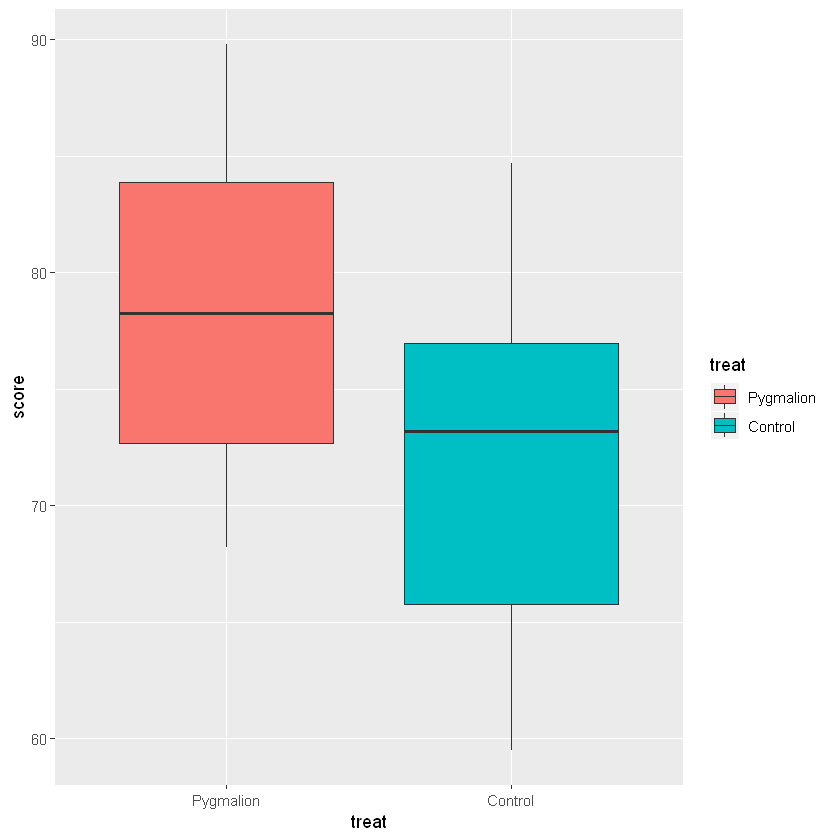

In [10]:
ggplot(data, aes(x=treat, y=score, fill=treat))+geom_boxplot()

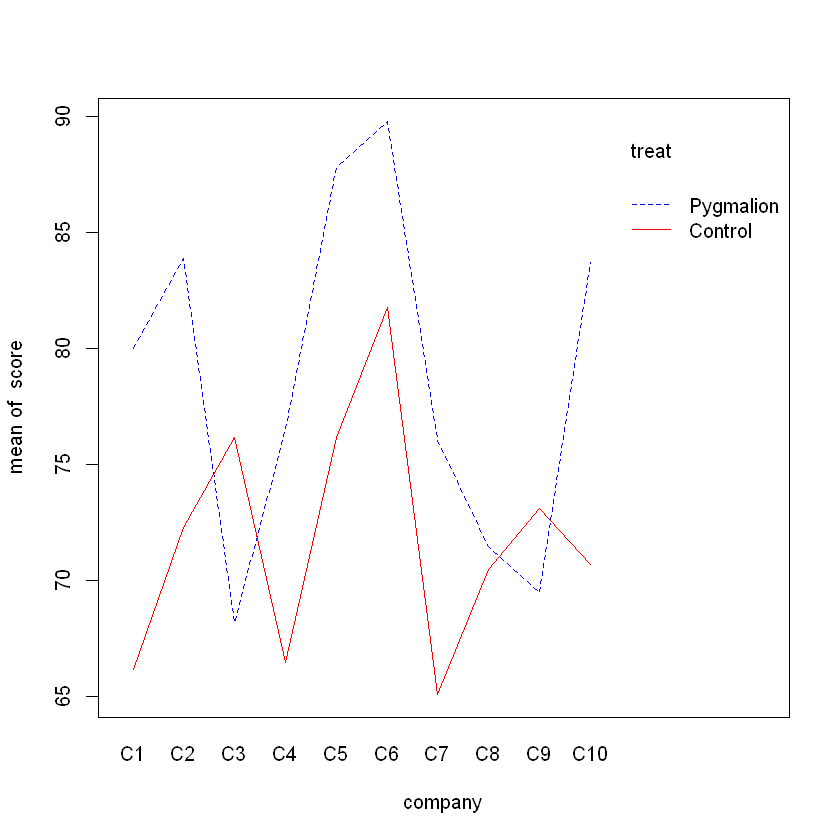

In [23]:
interaction.plot(company, treat, score, col=c('blue','red'))

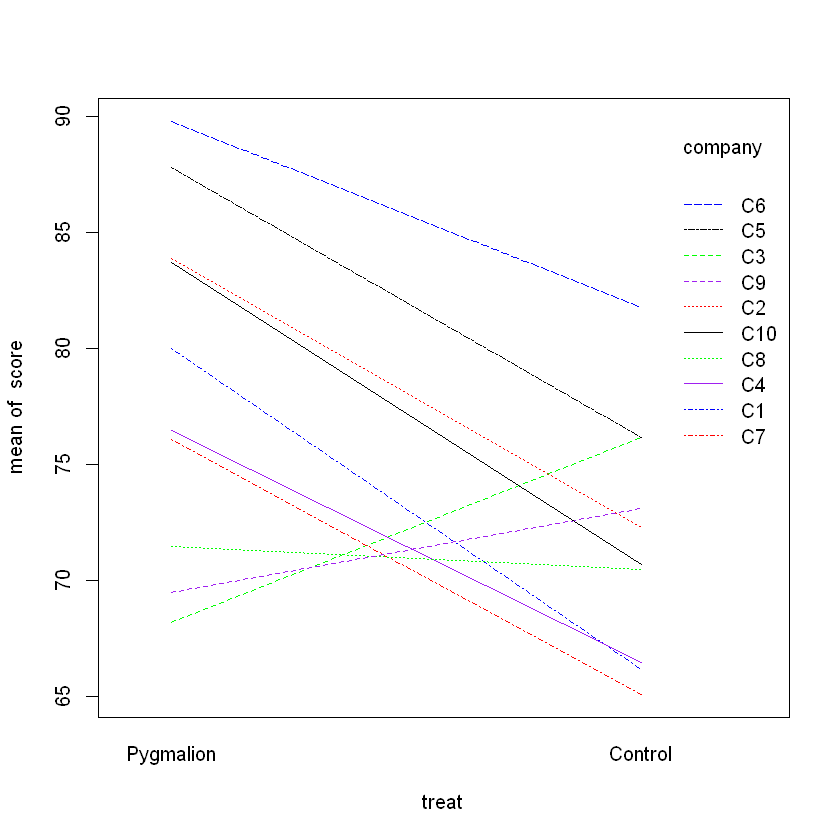

In [25]:
interaction.plot(treat, company, score, col=c('blue','red','green','purple','black'))

 - Response: score on a test 
 - Factors: 
  1. Company: 10 levels (C1,...,C10)
  2. Treatment: 2 levels (Pygmalion, Control)
 - Aim: investigate the interaction between Company and Treatment
 - Method: Fit a Two-Way ANOVA

_**Variables**_
- $Y_i$ score for $i$th platoon
- Explanatory: $9(\mathbb{I}_{C_m, i})+1(\mathbb{I}_{P_n,i})+9(Interaction)$ <br>
For each indicter: $\mathbb{I_{C_m,i}}=I$(ith platoon is from Company m), $\mathbb{I_{P_n,i}}=I$(ith platoon is 'Pygmalion')

#### Overall test and Partial Test
Overall test $H_0: \beta = \vec{0}$ <br>
Partial test $H_0: $ subset of $\beta$ are $0$ <br>
Test statistic: $$F = \frac{(SSReg_{full} - SSReg_{reduced}) / d.f._{reduced}} {MSE_{full}}\\
=  \frac{(RSS_{full} - RSS_{reduced}) / d.f._{reduced}} {MSE_{full}} \\
\sim F_{d.f._{full}, d.f._{error}}$$
We can use partial test to see if the interaction terms are needed

In [15]:
model_i = lm(score~company*treat)
summary(model_i)


Call:
lm(formula = score ~ company * treat)

Residuals:
   Min     1Q Median     3Q    Max 
  -9.2   -2.3    0.0    2.3    9.2 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               80.000      7.204  11.105 1.49e-06 ***
companyC2                  3.900     10.188   0.383    0.711    
companyC3                -11.800     10.188  -1.158    0.277    
companyC4                 -3.500     10.188  -0.344    0.739    
companyC5                  7.800     10.188   0.766    0.463    
companyC6                  9.800     10.188   0.962    0.361    
companyC7                 -3.900     10.188  -0.383    0.711    
companyC8                 -8.500     10.188  -0.834    0.426    
companyC9                -10.500     10.188  -1.031    0.330    
companyC10                 3.700     10.188   0.363    0.725    
treatControl             -13.800      8.823  -1.564    0.152    
companyC2:treatControl     2.200     12.477   0.176    0.864    
companyC3:t

In [16]:
anova(model_i)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
company,9,670.9755,74.55284,1.4366558,0.29901878
treat,1,338.8828,338.88279,6.5303739,0.03091657
company:treat,9,311.4640,34.60711,0.6668895,0.72211538
Residuals,9,467.0399,51.89332,NA,NA


Warning message:
"not plotting observations with leverage one:
  1, 4, 7, 8, 9, 12, 15, 18, 21, 24, 27"

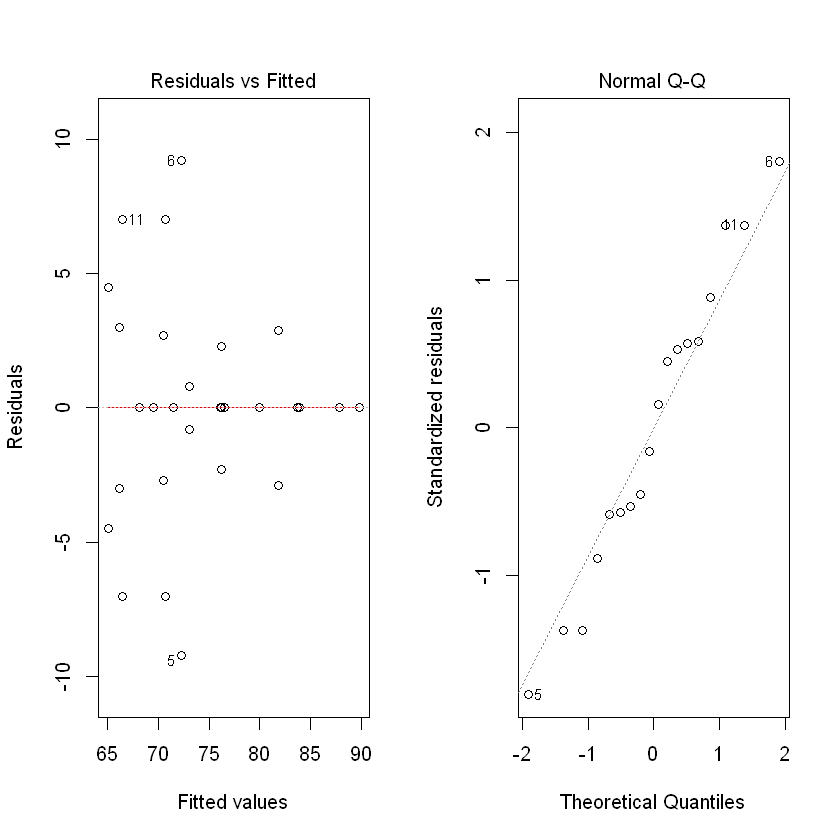

In [17]:
par(mfrow=c(1,2))
plot(model_i, which=1:2)

In [19]:
model_a = lm(score~company+treat)
summary(model_a)


Call:
lm(formula = score ~ company + treat)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.660  -4.147   1.853   3.853   7.740 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  75.61367    4.16822  18.141 5.16e-13 ***
companyC2     5.36667    5.36968   0.999   0.3308    
companyC3     0.19658    6.01886   0.033   0.9743    
companyC4    -0.96667    5.36968  -0.180   0.8591    
companyC5     9.26667    5.36968   1.726   0.1015    
companyC6    13.66667    5.36968   2.545   0.0203 *  
companyC7    -2.03333    5.36968  -0.379   0.7094    
companyC8     0.03333    5.36968   0.006   0.9951    
companyC9     1.10000    5.36968   0.205   0.8400    
companyC10    4.23333    5.36968   0.788   0.4407    
treatControl -7.22051    2.57951  -2.799   0.0119 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.576 on 18 degrees of freedom
Multiple R-squared:  0.5647,	Adjusted R-squared:  0.3228 
F-statistic: 2.3

In [20]:
anova(model_a)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
company,9,670.9755,74.55284,1.723756,0.15556403
treat,1,338.8828,338.88279,7.835401,0.01185757
Residuals,18,778.5039,43.25022,NA,NA


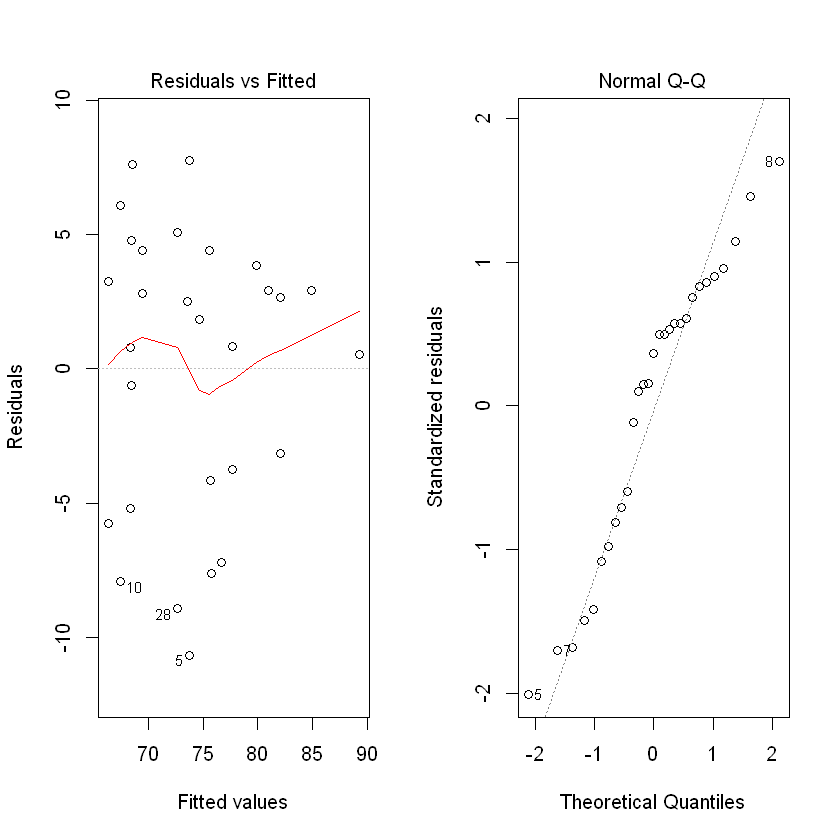

In [21]:
par(mfrow=c(1,2))
plot(model_a, which=1:2)